In [1]:
!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2019.csv

--2022-06-20 23:53:18--  https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2019.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88842717 (85M) [text/plain]
Saving to: ‘dadosLimpos2019.csv.1’

dadosLimpos2019.csv 100%[===================>]  84,73M  6,43MB/s    in 13s     

2022-06-20 23:53:34 (6,35 MB/s) - ‘dadosLimpos2019.csv.1’ saved [88842717/88842717]



In [2]:
!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2020.csv

--2022-06-20 23:53:39--  https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2020.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68691298 (66M) [text/plain]
Saving to: ‘dadosLimpos2020.csv.1’

dadosLimpos2020.csv 100%[===================>]  65,51M  6,28MB/s    in 10s     

2022-06-20 23:53:52 (6,33 MB/s) - ‘dadosLimpos2020.csv.1’ saved [68691298/68691298]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fies2019 = pd.read_csv('./dadosLimpos2019.csv', encoding="UTF-8")

fies2020 = pd.read_csv('./dadosLimpos2020.csv', encoding="UTF-8")

# Exploração dos dados 2019

### Faixa de renda per capita predominante no requerimento do FIES

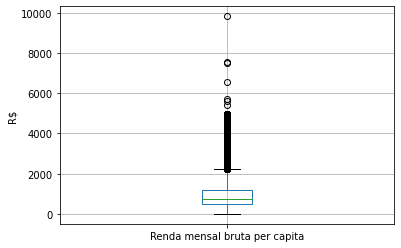

In [5]:

fies2019.boxplot(column=['Renda mensal bruta per capita'])
plt.ylabel('R$')
plt.show()

Após a análise do boxplot pode-se verificar que a renda concentra-se entre quem não tem nenhuma renda, até o valor de 2000 reais. Tendo um número considerável de outliers com valores maiores que 2000 .

## Dispersão para o número de inscrições para os estados.

O Estado SP foi oque teve um maior número de incrições, totalizando 32896

O Estado RR foi oque teve um menor número de incrições, totalizando 374



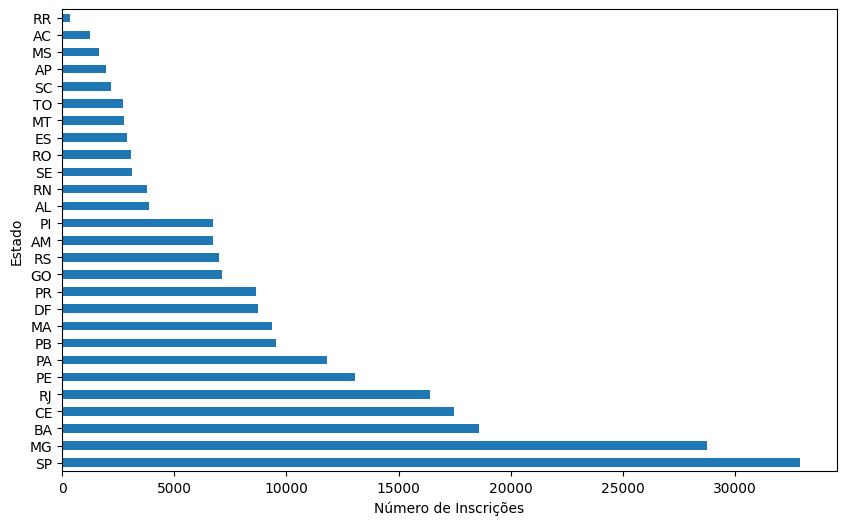

In [6]:
fies2019_estado = fies2019['UF do Local de Oferta'].value_counts()
maior_Inscricao = fies2019_estado.max()
estado = fies2019_estado[ fies2019_estado ==  maior_Inscricao].index[0]
print(f"O Estado {estado} foi oque teve um maior número de incrições, totalizando {maior_Inscricao}\n")

menor_Inscricao = fies2019_estado.min()
estado = fies2019_estado[ fies2019_estado ==  menor_Inscricao].index[0]
print(f"O Estado {estado} foi oque teve um menor número de incrições, totalizando {menor_Inscricao}\n")


fies2019_estado.plot.barh(figsize=(10,6))
plt.ylabel('Estado')
plt.xlabel('Número de Inscrições')
plt.show()

O estado de São Paulo, com 32897 inscrições foi o estado com maior número de inscrições do País,  em contrapartida, Roraima foi o estado com menos inscrições, sendo 374 inscrições para todo o estado. Verifica-se uma baixa dispersão entre os números de inscrição por estado, tendo as inscrições concentradas nos estados : RJ, CE, BA, MG e SP.

##  Faixa predominante de espera entre a conclusão do ensino médio e a inscrição na faculdade por meio do FIES

In [7]:
from datetime import date, timedelta

 
fies2019['Anos para inscrição após EM'] = fies2019['Ano conclusão ensino médio'].apply(lambda x : 2019 -  x) 

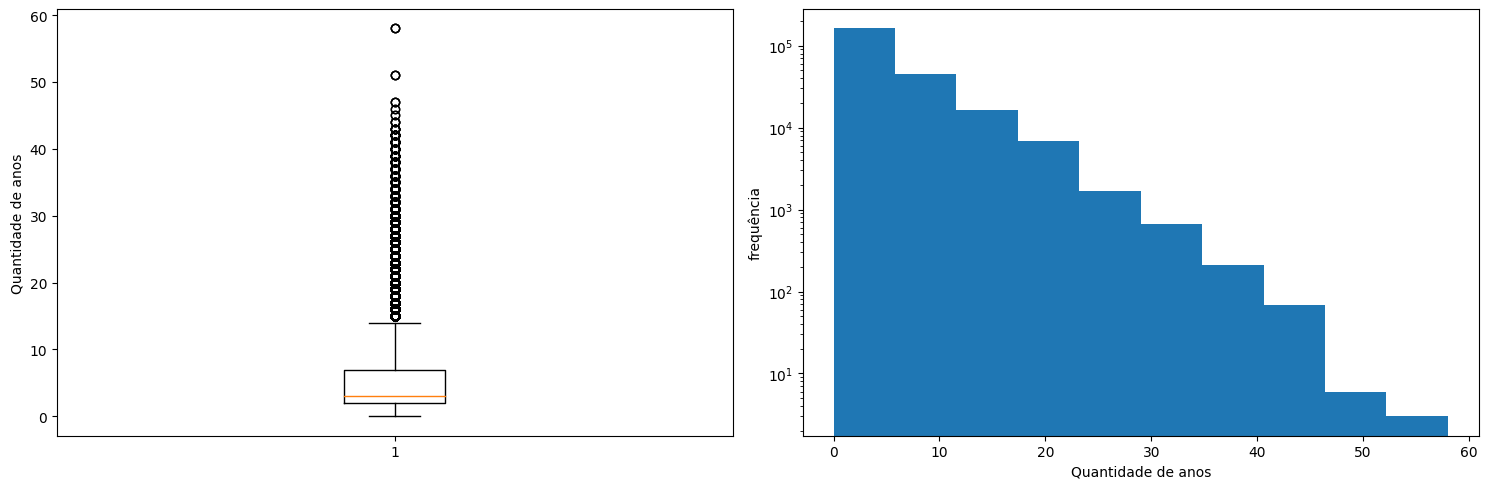

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

keys = list(fies2019['Anos para inscrição após EM'].keys())
values = list(fies2019['Anos para inscrição após EM'])



ax[0].boxplot(values)
ax[0].set(ylabel='Quantidade de anos')


ax[1].hist(values, bins=10)
ax[1].set(xlabel='Quantidade de anos', ylabel='frequência')
ax[1].set_yscale('log')
fig.tight_layout()

plt.show()

Observando os dados através de  boxplot e pelo histograma para a dispersão da faixa de espera entre a conclusão do ensino médio e a inscrição na faculdade por meio do FIES, pode-se verificar que a faixa predominante encontra-se entre 0 e 10 anos de espera.

##   As pessoas com deficiência estão menos inseridas nos aceitos do FIES?

Número de pessoas sem deficiência contratada:  25315
A porcentagem de pessoas sem deficiência contratada foi 10.98% 




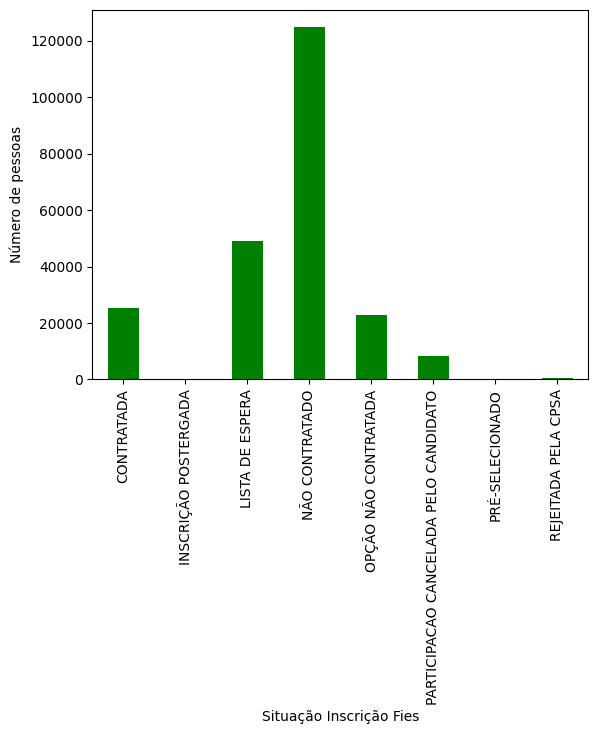

In [9]:
fies2019_pessoa_sem_deficiencia =  fies2019[fies2019['Pessoa com deficiência?'] == 'NÃO'] 

pessoas_contradatas_sem_def = fies2019_pessoa_sem_deficiencia[fies2019_pessoa_sem_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas sem deficiência contratada: ", pessoas_contradatas_sem_def['ID do estudante'].size )

porcentagem_aprovada = pessoas_contradatas_sem_def['ID do estudante'].size  * 100 /   fies2019_pessoa_sem_deficiencia['ID do estudante'].size 

print(f"A porcentagem de pessoas sem deficiência contratada foi {porcentagem_aprovada:.2f}% \n\n")

# Plotando o gráfico
fies2019_pessoa_sem_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.ylabel('Número de pessoas');
plt.show()

Número de pessoas com deficiência contratada:  139
A porcentagem de pessoas com deficiência contratada foi 7.62% 




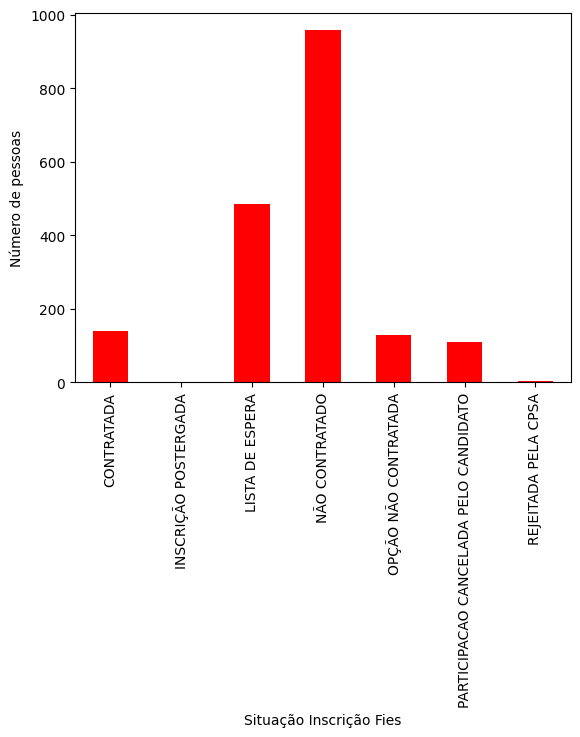

In [10]:


fies2019_pessoa_com_deficiencia =  fies2019[fies2019['Pessoa com deficiência?'] == 'SIM'] 

pessoas_contradatas_com_def = fies2019_pessoa_com_deficiencia[fies2019_pessoa_com_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas com deficiência contratada: ", pessoas_contradatas_com_def['ID do estudante'].size )

porcentagem_aprovada = pessoas_contradatas_com_def['ID do estudante'].size  * 100 /   fies2019_pessoa_com_deficiencia['ID do estudante'].size 

print(f"A porcentagem de pessoas com deficiência contratada foi {porcentagem_aprovada:.2f}% \n\n")

# Plotando o gráfico
fies2019_pessoa_com_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='r')
plt.ylabel('Número de pessoas');
plt.show()

Plotando um gráfico para pessoas com deficiência e para pessoas sem deficiência é possivél ver que os dados se assemelham, tendo um baixo nivél de aprovação nos dois casos. Sendo 10,98% de aprovação para pessoas sem deficiência, e uma porcentagem de 7,62% para pessoas com deficiência .

# Exploração dos dados 2020

### Faixa de renda per capita predominante no requerimento do FIES

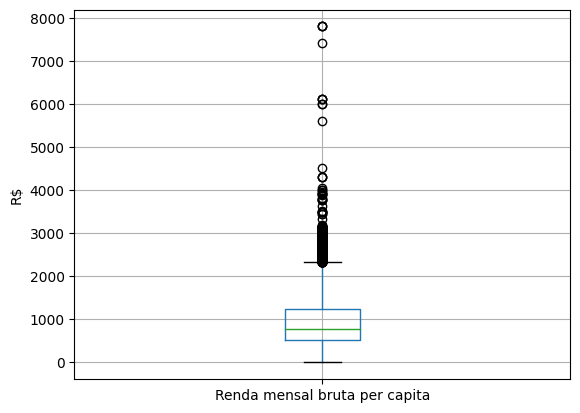

In [11]:

fies2020.boxplot(column=['Renda mensal bruta per capita'])
plt.ylabel('R$')
plt.show()

Após a análise do boxplot pode-se verificar que a renda concentra-se entre quem não tem nenhuma renda, até o valor de 2000 reais. Tendo um número considerável de outliers com valores entre 2000 e 4000.

## Dispersão para o número de inscrições para os estados.

O Estado SP foi oque teve um maior número de incrições, totalizando 24534

O Estado RR foi oque teve um menor número de incrições, totalizando 342



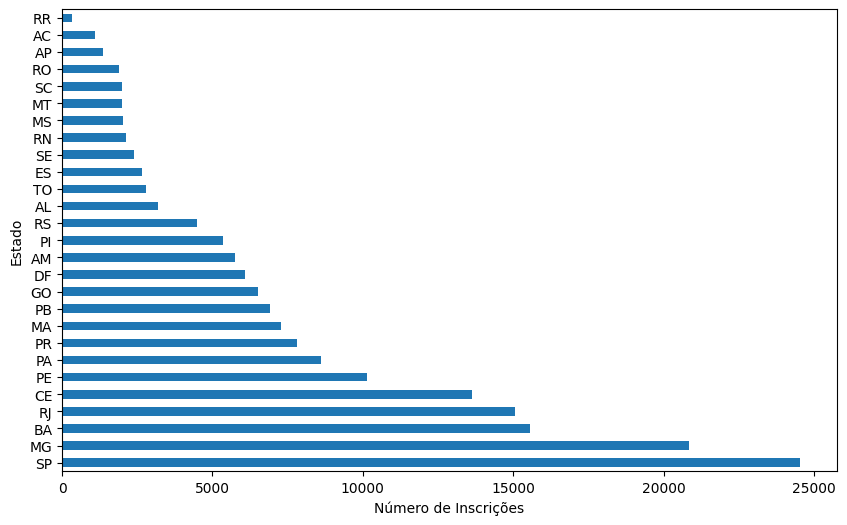

In [12]:
fies2020_estado = fies2020['UF do Local de Oferta'].value_counts()
maior_Inscricao = fies2020_estado.max()
estado = fies2020_estado[ fies2020_estado ==  maior_Inscricao].index[0]
print(f"O Estado {estado} foi oque teve um maior número de incrições, totalizando {maior_Inscricao}\n")

menor_Inscricao = fies2020_estado.min()
estado = fies2020_estado[ fies2020_estado ==  menor_Inscricao].index[0]
print(f"O Estado {estado} foi oque teve um menor número de incrições, totalizando {menor_Inscricao}\n")


fies2020_estado.plot.barh(figsize=(10,6))
plt.ylabel('Estado')
plt.xlabel('Número de Inscrições')
plt.show()

O estado de São Paulo, com 24534 inscrições foi o estado com maior número de inscrições do País,  em contrapartida, Roraima foi o estado com menos inscrições, sendo 342 inscrições para todo o estado. Verifica-se uma baixa dispersão entre os números de inscrição por estado, tendo as inscrições concentradas nos mesmos estados que nos dados de 2019.

##  Faixa predominante de espera entre a conclusão do ensino médio e a inscrição na faculdade por meio do FIES

In [13]:
fies2020['Anos para inscrição após EM'] = fies2020['Ano conclusão ensino médio'].apply(lambda x : 2020 -  x) 

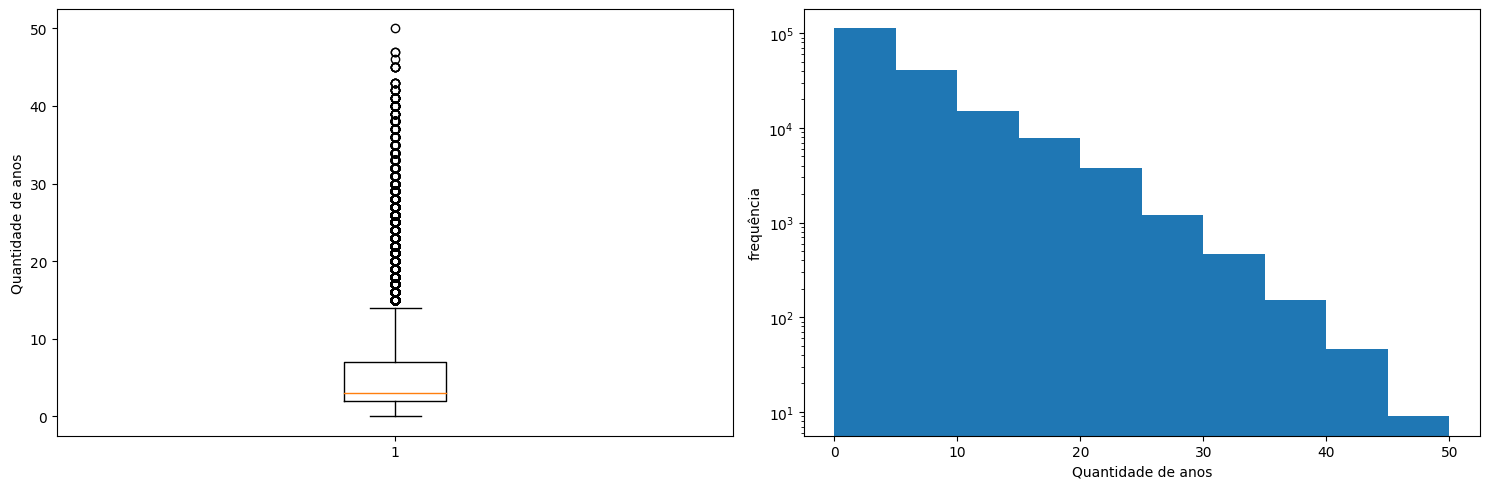

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

keys = list(fies2020['Anos para inscrição após EM'].keys())
values = list(fies2020['Anos para inscrição após EM'])


ax[0].boxplot(values)
ax[0].set(ylabel='Quantidade de anos')


ax[1].hist(values, bins=10)
ax[1].set(xlabel='Quantidade de anos', ylabel='frequência')
ax[1].set_yscale('log')
fig.tight_layout()

plt.show()

Observando os dados através do boxplot temos uma visão que a faixa predominante está entre 0 e 15, ao olhar para o histograma , pode-se verificar que é correspondente sendo as diferenças amenizadas pelo fato do gráfico estar em escala logaritma.

##   As pessoas com deficiência estão menos inseridas nos aceitos do FIES?

Número de pessoas sem deficiência contratada:  13338
A porcentagem de pessoas sem deficiência contratada foi 7.37% 




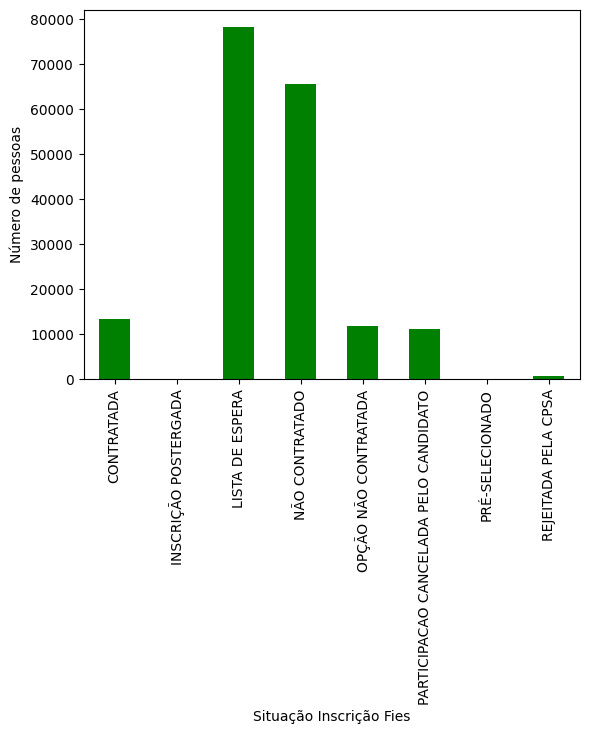

In [15]:
fies2020_pessoa_sem_deficiencia =  fies2020[fies2020['Pessoa com deficiência?'] == 'NÃO'] 

pessoas_contradatas_sem_def = fies2020_pessoa_sem_deficiencia[fies2020_pessoa_sem_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas sem deficiência contratada: ", pessoas_contradatas_sem_def['ID do estudante'].size )

porcentagem_aprovada = pessoas_contradatas_sem_def['ID do estudante'].size  * 100 /   fies2020_pessoa_sem_deficiencia['ID do estudante'].size 

print(f"A porcentagem de pessoas sem deficiência contratada foi {porcentagem_aprovada:.2f}% \n\n")

# Plotando o gráfico
fies2020_pessoa_sem_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.ylabel('Número de pessoas');
plt.show()

Número de pessoas com deficiência contratada:  77
A porcentagem de pessoas com deficiência contratada foi 5.01% 




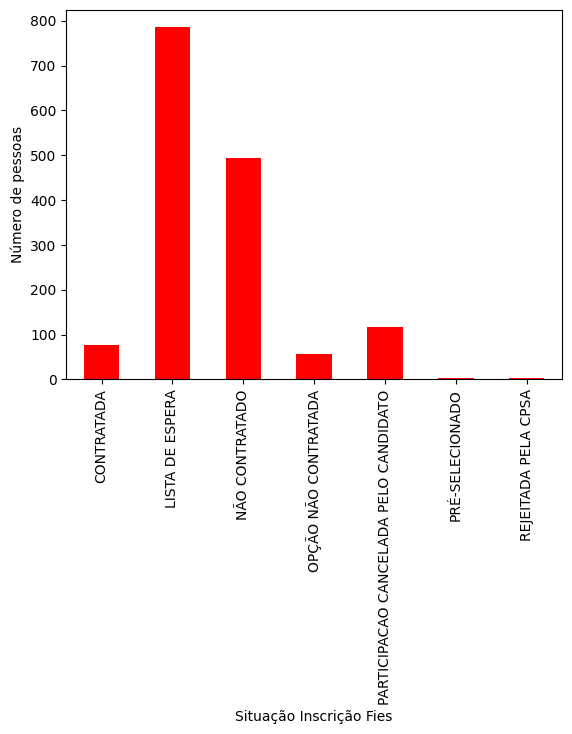

In [16]:
fies2020_pessoa_com_deficiencia =  fies2020[fies2020['Pessoa com deficiência?'] == 'SIM'] 

pessoas_contradatas_com_def = fies2020_pessoa_com_deficiencia[fies2020_pessoa_com_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas com deficiência contratada: ", pessoas_contradatas_com_def['ID do estudante'].size )

porcentagem_aprovada = pessoas_contradatas_com_def['ID do estudante'].size  * 100 /   fies2020_pessoa_com_deficiencia['ID do estudante'].size 

print(f"A porcentagem de pessoas com deficiência contratada foi {porcentagem_aprovada:.2f}% \n\n")

# Plotando o gráfico
fies2020_pessoa_com_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='r')
plt.ylabel('Número de pessoas');
plt.show()

Plotando um gráfico para pessoas com deficiência e para pessoas sem deficiência é possivél ver que os dados se assemelham, tendo um baixo nivél de aprovação nos dois casos, e uma grande parte dos candidatos na fila de espera. Sendo 7,37% de aprovação para pessoas sem deficiência, e uma porcentagem de 5,01% para pessoas com deficiência.